In [1]:
# !pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d42ee412e956dcd6a1ece4b46c666773d38a37ad45b809800d5b33aff02c7fc6
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("safrin03/predictive-analytics-for-customer-churn-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.0M/24.0M [00:00<00:00, 87.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/safrin03/predictive-analytics-for-customer-churn-dataset/versions/1


## Data Description

In [6]:
import pandas as pd
import os

data_descriptions_df = pd.read_csv(os.path.join(path, 'data_descriptions.csv'))
data_descriptions_df

Column_name Column_type Data_type                                                                                           Description
0                 AccountAge     Feature   integer                                                              The age of the user's account in months.
1             MonthlyCharges     Feature     float                                                    The amount charged to the user on a monthly basis.
2               TotalCharges     Feature     float                                   The total charges incurred by the user over the account's lifetime.
3           SubscriptionType     Feature    object                            The type of subscription chosen by the user (Basic, Standard, or Premium).
4              PaymentMethod     Feature    string                                                               The method of payment used by the user.
5           PaperlessBilling     Feature    string                               Indicates whether the user has opted for paperless billing (Yes or No).
6                ContentType     Feature    string                                The type of content preferred by the user (Movies, TV Shows, or Both).
7          MultiDeviceAccess     Feature    string                 Indicates whether the user has access to the service on multiple devices (Yes or No).
8           DeviceRegistered     Feature    string                          The type of device registered by the user (TV, Mobile, Tablet, or Computer).
9        ViewingHoursPerWeek     Feature     float                                        The number of hours the user spends watching content per week.
10    AverageViewingDuration     Feature     float                                              The average duration of each viewing session in minutes.
11  ContentDownloadsPerMonth     Feature   integer                                                The number of content downloads by the user per month.
12           GenrePreference     Feature    string                                                    The preferred genre of content chosen by the user.
13                UserRating     Feature     float                                               The user's rating for the service on a scale of 1 to 5.
14    SupportTicketsPerMonth     Feature   integer                                           The number of support tickets raised by the user per month.
15                    Gender     Feature    string                                                              The gender of the user (Male or Female).
16             WatchlistSize     Feature     float                                                          The number of items in the user's watchlist.
17           ParentalControl     Feature    string                               Indicates whether parental control is enabled for the user (Yes or No).
18          SubtitlesEnabled     Feature    string                                     Indicates whether subtitles are enabled for the user (Yes or No).
19                CustomerID  Identifier    string                                                                A unique identifier for each customer.
20                     Churn      Target   integer  The target variable indicating whether a user has churned or not (1 for churned, 0 for not churned).

## Training Dataset

In [7]:
train_df = pd.read_csv(os.path.join(path, 'train.csv'))
train_df.head()

AccountAge  MonthlyCharges  TotalCharges SubscriptionType     PaymentMethod PaperlessBilling ContentType MultiDeviceAccess DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth GenrePreference  UserRating  SupportTicketsPerMonth  Gender  WatchlistSize ParentalControl SubtitlesEnabled  CustomerID  Churn
0          20       11.055215    221.104302          Premium      Mailed check               No        Both                No           Mobile            36.758104               63.531377                        10          Sci-Fi    2.176498                       4    Male              3              No               No  CB6SXPNVZA      0
1          57        5.175208    294.986882            Basic       Credit card              Yes      Movies                No           Tablet            32.450568               25.725595                        18          Action    3.478632                       8    Male             23              No              Yes  S7R2G87O09      0
2          73       12.106657    883.785952            Basic      Mailed check              Yes      Movies                No         Computer             7.395160               57.364061                        23         Fantasy    4.238824                       6    Male              1             Yes              Yes  EASDC20BDT      0
3          32        7.263743    232.439774            Basic  Electronic check               No    TV Shows                No           Tablet            27.960389              131.537507                        30           Drama    4.276013                       2    Male             24             Yes              Yes  NPF69NT69N      0
4          57       16.953078    966.325422          Premium  Electronic check              Yes    TV Shows                No               TV            20.083397               45.356653                        20          Comedy    3.616170                       4  Female              0              No               No  4LGYPK7VOL      0

## Data Analysis of Training Dataset

In [8]:
profile = pp.ProfileReport(train_df, title="Train Dataset Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:14<00:00,  1.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Task
Perform PCA on the `train_df` dataset.

## Identify numerical features

### Subtask:
Select the numerical columns from the `train_df` that will be used for PCA.


**Reasoning**:
Inspect `data_descriptions_df` and `train_df` to identify numerical columns suitable for PCA.



In [10]:
print(data_descriptions_df[['Column_name', 'Data_type']])
print(train_df.info())

                 Column_name Data_type
0                 AccountAge   integer
1             MonthlyCharges     float
2               TotalCharges     float
3           SubscriptionType    object
4              PaymentMethod    string
5           PaperlessBilling    string
6                ContentType    string
7          MultiDeviceAccess    string
8           DeviceRegistered    string
9        ViewingHoursPerWeek     float
10    AverageViewingDuration     float
11  ContentDownloadsPerMonth   integer
12           GenrePreference    string
13                UserRating     float
14    SupportTicketsPerMonth   integer
15                    Gender    string
16             WatchlistSize     float
17           ParentalControl    string
18          SubtitlesEnabled    string
19                CustomerID    string
20                     Churn   integer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    

**Reasoning**:
Based on the data descriptions and `train_df.info()`, identify the numerical columns and create a list of their names. Exclude 'CustomerID' and 'Churn' as they are identifier and target variables, respectively.



In [11]:
numerical_cols = [
    'AccountAge',
    'MonthlyCharges',
    'TotalCharges',
    'ViewingHoursPerWeek',
    'AverageViewingDuration',
    'ContentDownloadsPerMonth',
    'UserRating',
    'SupportTicketsPerMonth',
    'WatchlistSize'
]

print(numerical_cols)

['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']


## Preprocess the data

### Subtask:
Scale the selected numerical features to ensure they have a similar range.


**Reasoning**:
Scale the selected numerical features using StandardScaler as instructed.



In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(train_df[numerical_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)
display(scaled_numerical_df.head())

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  WatchlistSize
0   -1.169131       -0.331703     -1.012550             1.445777               -0.568906                 -1.005712   -0.715179               -0.175519      -1.253786
1   -0.089945       -1.690423     -0.871303             1.062671               -1.317459                 -0.450971    0.411960                1.216976       1.526687
2    0.376731       -0.088741      0.254353            -1.165718               -0.691019                 -0.104258    1.069988                0.520728      -1.531833
3   -0.819125       -1.207816     -0.990879             0.663322                0.777613                  0.381141    1.102179               -0.871766       1.665711
4   -0.089945        1.031143      0.412150            -0.037246               -0.928765                 -0.312285    0.531014               -0.175519      -1.670857

## Apply pca

### Subtask:
Perform PCA on the scaled data and determine the number of components to keep.


**Reasoning**:
Perform PCA on the scaled numerical data and analyze the explained variance ratio to determine the number of components to keep.



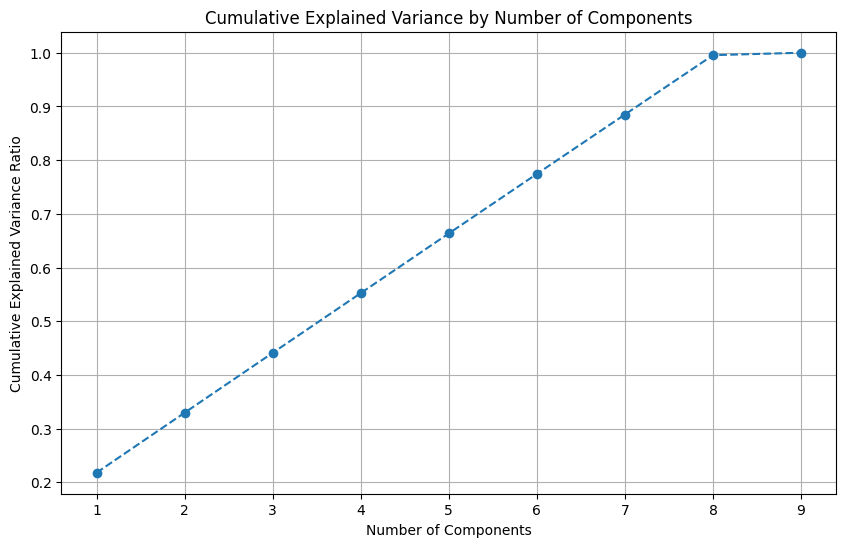

Explained variance ratio for each component: [0.21782239 0.11167362 0.11147358 0.11126899 0.11118502 0.11087269
 0.11062842 0.11050333 0.00457196]
Cumulative explained variance ratio: [0.21782239 0.32949601 0.44096959 0.55223858 0.6634236  0.77429629
 0.88492471 0.99542804 1.        ]


In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_numerical_df)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

print("Explained variance ratio for each component:", explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_explained_variance)

## Transform the data

### Subtask:
Transform the original data into the lower-dimensional PCA space.


**Reasoning**:
Transform the scaled data into the lower-dimensional PCA space using 8 components as determined in the previous step and create a new DataFrame with appropriate column names, then display the head of the new DataFrame.



In [14]:
pca = PCA(n_components=8)
pca_transformed_data = pca.fit_transform(scaled_numerical_df)
pca_df = pd.DataFrame(pca_transformed_data, columns=[f'PC{i+1}' for i in range(8)])
display(pca_df.head())

PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
0 -1.547771 -1.844759  0.020765 -0.346516 -0.784464 -0.010547 -0.475045  1.126374
1 -1.305249  0.581145  1.236602  0.876403 -0.323638 -1.450357  1.445939  1.426068
2  0.383797  0.468901 -0.865257 -1.100286 -0.728242 -1.481808 -0.691522 -0.541625
3 -1.643901  1.055887  0.762772  0.438452  1.922464  0.278269  0.167008  0.776540
4  0.621727 -0.276859 -0.585227 -1.164130 -1.163222 -0.216516 -1.265283  0.380195

## Analyze pca results

### Subtask:
Examine the explained variance ratio to understand how much variance is captured by each component and potentially visualize the results.


**Reasoning**:
Print the explained variance ratio and cumulative explained variance ratio for the fitted PCA model and create a plot for cumulative explained variance.



In [15]:
print("Explained variance ratio for each component:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(np.cumsum(pca.explained_variance_ratio_)) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

Explained variance ratio for each component: [0.21782239 0.11167362 0.11147358 0.11126899 0.11118502 0.11087269
 0.11062842 0.11050333]
Cumulative explained variance ratio: [0.21782239 0.32949601 0.44096959 0.55223858 0.6634236  0.77429629
 0.88492471 0.99542804]


## Summary:

### Data Analysis Key Findings

*   Nine numerical features were selected for PCA: 'AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', and 'WatchlistSize'.
*   The numerical data was successfully scaled using `StandardScaler`.
*   Performing PCA on the scaled data revealed that the first principal component explains approximately 21.78\% of the variance.
*   The cumulative explained variance reaches approximately 99.54\% with 8 components and 100\% with 9 components.
*   The data was transformed into an 8-dimensional PCA space.

### Insights or Next Steps

*   The PCA analysis effectively reduced the dimensionality of the numerical features while retaining a high percentage of the variance, indicating that the 8 principal components capture most of the information from the original 9 features.
*   The resulting 8 PCA components can now be used as features in subsequent modeling tasks, potentially improving model performance and reducing computational complexity.


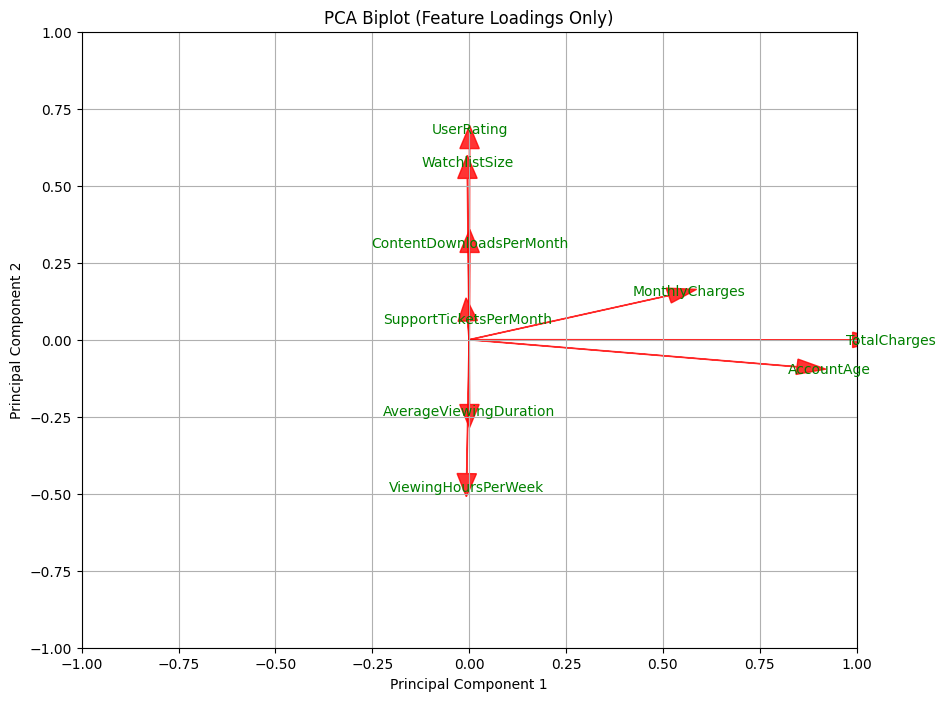

In [17]:
# Get the loadings (eigenvectors)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a figure for the biplot
plt.figure(figsize=(10, 8))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot (Feature Loadings Only)')
plt.grid(True)

# Plot the loadings as arrows
for i, feature in enumerate(numerical_cols):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.8, head_width=0.05)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, feature, color='g', ha='center', va='center')

# Set limits to better visualize the loadings
plt.xlim([-1, 1]) # Adjust limits as needed based on your loadings
plt.ylim([-1, 1]) # Adjust limits as needed based on your loadings

plt.show()

## Summary:

### Data Analysis Key Findings

* Nine numerical features were selected for PCA: 'AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', and 'WatchlistSize'.
* The numerical data was successfully scaled using `StandardScaler`.
* Performing PCA on the scaled data revealed that the first principal component explains approximately 21.78\% of the variance.
* The cumulative explained variance reaches approximately 99.54\% with 8 components and 100\% with 9 components.
* The data was transformed into an 8-dimensional PCA space.
* The PCA biplot visualizes the first two principal components and the loadings of the original features, providing insights into how the original features contribute to the principal components.

### Insights or Next Steps

* The PCA analysis effectively reduced the dimensionality of the numerical features while retaining a high percentage of the variance, indicating that the 8 principal components capture most of the information from the original 9 features.
* The resulting 8 PCA components can now be used as features in subsequent modeling tasks, potentially improving model performance and reducing computational complexity.
* Further analysis could involve examining the loadings more closely to understand which original features contribute most to each principal component, especially the first few components that explain the most variance.
* The transformed PCA data (`pca_df`) can be combined with the non-numerical features and the target variable (`Churn`) for downstream machine learning tasks.

## Insights from the PCA Biplot (Feature Loadings)

The biplot visualizes how the original numerical features contribute to the first two principal components (PC1 and PC2). By observing the direction and length of the arrows representing each feature, we can infer relationships:

*   **Features pointing in the same direction:** These features are positively correlated with each other in the space of PC1 and PC2. For example, if two arrows point generally towards the top right, it suggests that high values in one feature tend to correspond with high values in the other, and both are positively associated with higher values in both PC1 and PC2.
*   **Features pointing in opposite directions:** These features are negatively correlated with each other. If one arrow points to the right and another to the left, it suggests that high values in one feature tend to correspond with low values in the other.
*   **Features with arrows close to perpendicular:** These features are largely uncorrelated with each other in the plane of PC1 and PC2.
*   **Length of the arrows:** The length of an arrow indicates the strength of the feature's contribution to these two principal components. Longer arrows suggest the feature is more strongly represented by PC1 and PC2.

Based on the biplot, you can analyze the clusters and directions of the feature arrows to identify which original numerical features are most strongly correlated with the first two principal components and how they relate to each other. For instance, observe which features have arrows aligned with PC1 (horizontal axis) and PC2 (vertical axis) to understand what these components primarily capture.

# Task
Analyze the provided dataset to identify the features most relevant for predicting customer churn using mutual information. Separate the features and target variable, calculate mutual information for both categorical and numerical features, and present the results to highlight the most influential factors.

## Separate features and target

### Subtask:
Separate the `train_df` into features (X) and the target variable (y), which is 'Churn'.


**Reasoning**:
Separate the features (X) and the target variable (y) from the training DataFrame and display their heads to verify the separation.



In [18]:
X = train_df.drop('Churn', axis=1)
y = train_df['Churn']

display(X.head())
display(y.head())

AccountAge  MonthlyCharges  TotalCharges SubscriptionType     PaymentMethod PaperlessBilling ContentType MultiDeviceAccess DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth GenrePreference  UserRating  SupportTicketsPerMonth  Gender  WatchlistSize ParentalControl SubtitlesEnabled  CustomerID
0          20       11.055215    221.104302          Premium      Mailed check               No        Both                No           Mobile            36.758104               63.531377                        10          Sci-Fi    2.176498                       4    Male              3              No               No  CB6SXPNVZA
1          57        5.175208    294.986882            Basic       Credit card              Yes      Movies                No           Tablet            32.450568               25.725595                        18          Action    3.478632                       8    Male             23              No              Yes  S7R2G87O09
2          73       12.106657    883.785952            Basic      Mailed check              Yes      Movies                No         Computer             7.395160               57.364061                        23         Fantasy    4.238824                       6    Male              1             Yes              Yes  EASDC20BDT
3          32        7.263743    232.439774            Basic  Electronic check               No    TV Shows                No           Tablet            27.960389              131.537507                        30           Drama    4.276013                       2    Male             24             Yes              Yes  NPF69NT69N
4          57       16.953078    966.325422          Premium  Electronic check              Yes    TV Shows                No               TV            20.083397               45.356653                        20          Comedy    3.616170                       4  Female              0              No               No  4LGYPK7VOL

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

## Identify feature types

### Subtask:
Identify the numerical and categorical features in the dataset, excluding 'CustomerID'.


**Reasoning**:
Create lists of categorical and numerical column names from the features DataFrame `X`, excluding 'CustomerID'.



In [19]:
all_cols = X.columns.tolist()

categorical_cols = [col for col in all_cols if X[col].dtype in ['object', 'string'] and col != 'CustomerID']
numerical_cols = [col for col in all_cols if X[col].dtype in ['int64', 'float64'] and col != 'CustomerID']

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']
Numerical columns: ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']


## Calculate mutual information for categorical features

### Subtask:
Calculate the mutual information between each categorical feature and the 'Churn' variable.


**Reasoning**:
Calculate the mutual information between each categorical feature in X and the target variable y, then store and print the results.



In [21]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Separate categorical features
X_categorical = X[categorical_cols]

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Convert the encoded features back to a DataFrame with appropriate column names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoded_feature_names)

# Calculate mutual information for encoded categorical features
mi_categorical = mutual_info_classif(X_categorical_encoded_df, y, random_state=42)
mi_categorical = pd.Series(mi_categorical, index=X_categorical_encoded_df.columns)

print(mi_categorical)

SubscriptionType_Basic            0.013003
SubscriptionType_Premium          0.012594
SubscriptionType_Standard         0.012087
PaymentMethod_Bank transfer       0.008488
PaymentMethod_Credit card         0.007307
PaymentMethod_Electronic check    0.006826
PaymentMethod_Mailed check        0.006375
PaperlessBilling_No               0.028014
PaperlessBilling_Yes              0.028716
ContentType_Both                  0.012429
ContentType_Movies                0.013284
ContentType_TV Shows              0.011804
MultiDeviceAccess_No              0.028076
MultiDeviceAccess_Yes             0.027889
DeviceRegistered_Computer         0.007245
DeviceRegistered_Mobile           0.006957
DeviceRegistered_TV               0.006652
DeviceRegistered_Tablet           0.006159
GenrePreference_Action            0.004223
GenrePreference_Comedy            0.004947
GenrePreference_Drama             0.002787
GenrePreference_Fantasy           0.005570
GenrePreference_Sci-Fi            0.003105
Gender_Fema

**Reasoning**:
The error "could not convert string to float: 'Premium'" indicates that `mutual_info_classif` cannot directly handle string categorical features. These need to be encoded numerically. I will use one-hot encoding on the categorical features before calculating mutual information.



## Calculate mutual information for numerical features

### Subtask:
Calculate the mutual information between each numerical feature and the 'Churn' variable.

**Reasoning**:
Calculate the mutual information between each numerical feature in X and the target variable y, then store and print the results.

In [22]:
# Calculate mutual information for numerical features
mi_numerical = mutual_info_classif(X[numerical_cols], y, random_state=42)
mi_numerical = pd.Series(mi_numerical, index=numerical_cols)

print(mi_numerical)

AccountAge                  0.020160
MonthlyCharges              0.004598
TotalCharges                0.008311
ViewingHoursPerWeek         0.008179
AverageViewingDuration      0.009995
ContentDownloadsPerMonth    0.008945
UserRating                  0.000453
SupportTicketsPerMonth      0.007468
WatchlistSize               0.001497
dtype: float64


## Combine and display results

### Subtask:
Combine the mutual information scores for both categorical and numerical features and display the results to identify the most relevant features for predicting churn.

**Reasoning**:
Combine the mutual information scores from `mi_categorical` and `mi_numerical`, sort the combined results, and display them to see which features have the highest mutual information with the target variable 'Churn'.

In [23]:
# Combine mutual information scores from categorical and numerical features
mi_combined = pd.concat([mi_categorical, mi_numerical])

# Sort the features by mutual information score in descending order
mi_combined_sorted = mi_combined.sort_values(ascending=False)

print("Mutual Information Scores (Sorted):")
print(mi_combined_sorted)

Mutual Information Scores (Sorted):
SubtitlesEnabled_Yes              0.029293
Gender_Male                       0.029244
PaperlessBilling_Yes              0.028716
ParentalControl_Yes               0.028307
SubtitlesEnabled_No               0.028142
MultiDeviceAccess_No              0.028076
PaperlessBilling_No               0.028014
MultiDeviceAccess_Yes             0.027889
ParentalControl_No                0.027443
Gender_Female                     0.027161
AccountAge                        0.020160
ContentType_Movies                0.013284
SubscriptionType_Basic            0.013003
SubscriptionType_Premium          0.012594
ContentType_Both                  0.012429
SubscriptionType_Standard         0.012087
ContentType_TV Shows              0.011804
AverageViewingDuration            0.009995
ContentDownloadsPerMonth          0.008945
PaymentMethod_Bank transfer       0.008488
TotalCharges                      0.008311
ViewingHoursPerWeek               0.008179
SupportTicketsPerM

## Analysis and Summary of Mutual Information Findings

The mutual information analysis helps quantify the dependency between each feature and the target variable 'Churn'. A higher mutual information score indicates a stronger relationship and thus higher relevance for predicting churn.

Based on the sorted mutual information scores:

*   The top features with the highest mutual information scores appear to be related to **Subtitles Enabled (Yes/No)**, **Gender (Male/Female)**, **Paperless Billing (Yes/No)**, and **Parental Control (Yes/No)**. These categorical features show the strongest individual relationships with customer churn in this dataset.
*   Among the numerical features, **Account Age** has the highest mutual information score, suggesting it is the most relevant numerical feature for predicting churn.
*   Features like **User Rating** and **Watchlist Size** have very low mutual information scores, indicating a weaker relationship with churn compared to other features in this dataset.
*   The different categories within features like `SubscriptionType`, `PaymentMethod`, `ContentType`, and `DeviceRegistered` also show varying levels of mutual information, allowing us to see which specific categories within these features are more related to churn. For example, within `SubscriptionType`, 'Basic' and 'Premium' have slightly higher mutual information than 'Standard'.

These insights suggest that customer churn is more strongly associated with certain binary/categorical preferences and account characteristics (like age) than with engagement metrics such as viewing hours or watchlist size.

### Next Steps:

The features identified as most relevant through mutual information could be prioritized for further investigation, feature engineering, or inclusion in predictive models for customer churn. While mutual information identifies individual feature relevance, it doesn't capture interactions between features, which could be explored using other methods or directly in model building.

# Task
Perform feature engineering on the dataset to prepare it for churn prediction. This includes handling categorical and numerical features and creating new features.

## Handle categorical features

### Subtask:
Apply appropriate encoding techniques (like one-hot encoding or label encoding) to convert categorical features into a numerical format suitable for modeling.


**Reasoning**:
Apply one-hot encoding to the categorical features and create a new DataFrame with the encoded features.



In [24]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_cols])

# Convert the encoded features back to a DataFrame with appropriate column names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoded_feature_names)

# Display the head of the encoded DataFrame
display(X_categorical_encoded_df.head())

SubscriptionType_Basic  SubscriptionType_Premium  SubscriptionType_Standard  PaymentMethod_Bank transfer  PaymentMethod_Credit card  PaymentMethod_Electronic check  PaymentMethod_Mailed check  PaperlessBilling_No  PaperlessBilling_Yes  ContentType_Both  ContentType_Movies  ContentType_TV Shows  MultiDeviceAccess_No  MultiDeviceAccess_Yes  DeviceRegistered_Computer  DeviceRegistered_Mobile  DeviceRegistered_TV  DeviceRegistered_Tablet  GenrePreference_Action  GenrePreference_Comedy  GenrePreference_Drama  GenrePreference_Fantasy  GenrePreference_Sci-Fi  Gender_Female  Gender_Male  ParentalControl_No  ParentalControl_Yes  SubtitlesEnabled_No  SubtitlesEnabled_Yes
0                     0.0                       1.0                        0.0                          0.0                        0.0                             0.0                         1.0                  1.0                   0.0               1.0                 0.0                   0.0                   1.0                    0.0                        0.0                      1.0                  0.0                      0.0                     0.0                     0.0                    0.0                      0.0                     1.0            0.0          1.0                 1.0                  0.0                  1.0                   0.0
1                     1.0                       0.0                        0.0                          0.0                        1.0                             0.0                         0.0                  0.0                   1.0               0.0                 1.0                   0.0                   1.0                    0.0                        0.0                      0.0                  0.0                      1.0                     1.0                     0.0                    0.0                      0.0                     0.0            0.0          1.0                 1.0                  0.0                  0.0                   1.0
2                     1.0                       0.0                        0.0                          0.0                        0.0                             0.0                         1.0                  0.0                   1.0               0.0                 1.0                   0.0                   1.0                    0.0                        1.0                      0.0                  0.0                      0.0                     0.0                     0.0                    0.0                      1.0                     0.0            0.0          1.0                 0.0                  1.0                  0.0                   1.0
3                     1.0                       0.0                        0.0                          0.0                        0.0                             1.0                         0.0                  1.0                   0.0               0.0                 0.0                   1.0                   1.0                    0.0                        0.0                      0.0                  0.0                      1.0                     0.0                     0.0                    1.0                      0.0                     0.0            0.0          1.0                 0.0                  1.0                  0.0                   1.0
4                     0.0                       1.0                        0.0                          0.0                        0.0                             1.0                         0.0                  0.0                   1.0               0.0                 0.0                   1.0                   1.0                    0.0                        0.0                      0.0                  1.0                      0.0                     0.0                     1.0                    0.0                      0.0                     0.0            1.0          0.0                 1.0                  0.0         

## Handle numerical features

### Subtask:
Consider potential transformations (like scaling or creating interaction terms) for numerical features based on their distributions and relationships with the target variable.


**Reasoning**:
Select the numerical columns from the original features DataFrame X and scale them using StandardScaler, then create a new DataFrame with the scaled data and display its head.



In [25]:
# Select numerical columns
X_numerical = X[numerical_cols]

# Apply StandardScaler to scale numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Create a new DataFrame with scaled numerical features
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_cols)

# Display the head of the scaled numerical DataFrame
display(X_numerical_scaled_df.head())

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  WatchlistSize
0   -1.169131       -0.331703     -1.012550             1.445777               -0.568906                 -1.005712   -0.715179               -0.175519      -1.253786
1   -0.089945       -1.690423     -0.871303             1.062671               -1.317459                 -0.450971    0.411960                1.216976       1.526687
2    0.376731       -0.088741      0.254353            -1.165718               -0.691019                 -0.104258    1.069988                0.520728      -1.531833
3   -0.819125       -1.207816     -0.990879             0.663322                0.777613                  0.381141    1.102179               -0.871766       1.665711
4   -0.089945        1.031143      0.412150            -0.037246               -0.928765                 -0.312285    0.531014               -0.175519      -1.670857

## Create new features

### Subtask:
Explore creating new features from existing ones that might capture more complex relationships related to churn (e.g., ratios, interaction terms between relevant features identified by mutual information).


**Reasoning**:
Create new features as instructed by the subtask, including the ratio of TotalCharges to AccountAge and interaction terms between relevant features, then add these to the scaled numerical DataFrame and display the head.



In [26]:
# Create the ratio of TotalCharges to AccountAge, handling division by zero
X_numerical_scaled_df['TotalCharges_per_AccountAge'] = X_numerical_scaled_df.apply(
    lambda row: row['TotalCharges'] / row['AccountAge'] if row['AccountAge'] != 0 else 0, axis=1
)

# Create interaction terms based on high mutual information features
# Using the original binary categorical features before encoding for interactions
X_numerical_scaled_df['AccountAge_PaperlessBilling_Yes_interaction'] = X_numerical_scaled_df['AccountAge'] * X_categorical_encoded_df['PaperlessBilling_Yes']
X_numerical_scaled_df['AccountAge_MultiDeviceAccess_No_interaction'] = X_numerical_scaled_df['AccountAge'] * X_categorical_encoded_df['MultiDeviceAccess_No']

display(X_numerical_scaled_df.head())

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  WatchlistSize  TotalCharges_per_AccountAge  AccountAge_PaperlessBilling_Yes_interaction  AccountAge_MultiDeviceAccess_No_interaction
0   -1.169131       -0.331703     -1.012550             1.445777               -0.568906                 -1.005712   -0.715179               -0.175519      -1.253786                     0.866070                                    -0.000000                                    -1.169131
1   -0.089945       -1.690423     -0.871303             1.062671               -1.317459                 -0.450971    0.411960                1.216976       1.526687                     9.687101                                    -0.089945                                    -0.089945
2    0.376731       -0.088741      0.254353            -1.165718               -0.691019                 -0.104258    1.069988                0.520728      -1.531833                     0.675158                                     0.376731                                     0.376731
3   -0.819125       -1.207816     -0.990879             0.663322                0.777613                  0.381141    1.102179               -0.871766       1.665711                     1.209680                                    -0.000000                                    -0.819125
4   -0.089945        1.031143      0.412150            -0.037246               -0.928765                 -0.312285    0.531014               -0.175519      -1.670857                    -4.582269                                    -0.089945                                    -0.089945

## Combine engineered features

### Subtask:
Create a new DataFrame that includes the original features (if not transformed in place) and the newly engineered features.


**Reasoning**:
Concatenate the scaled numerical features and the one-hot encoded categorical features into a single DataFrame and display its head.



In [27]:
X_engineered = pd.concat([X_numerical_scaled_df, X_categorical_encoded_df], axis=1)
display(X_engineered.head())

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  WatchlistSize  TotalCharges_per_AccountAge  AccountAge_PaperlessBilling_Yes_interaction  AccountAge_MultiDeviceAccess_No_interaction  SubscriptionType_Basic  SubscriptionType_Premium  SubscriptionType_Standard  PaymentMethod_Bank transfer  PaymentMethod_Credit card  PaymentMethod_Electronic check  PaymentMethod_Mailed check  PaperlessBilling_No  PaperlessBilling_Yes  ContentType_Both  ContentType_Movies  ContentType_TV Shows  MultiDeviceAccess_No  MultiDeviceAccess_Yes  DeviceRegistered_Computer  DeviceRegistered_Mobile  DeviceRegistered_TV  DeviceRegistered_Tablet  GenrePreference_Action  GenrePreference_Comedy  GenrePreference_Drama  GenrePreference_Fantasy  GenrePreference_Sci-Fi  Gender_Female  Gender_Male  ParentalControl_No  ParentalControl_Yes  SubtitlesEnabled_No  SubtitlesEnabled_Yes
0   -1.169131       -0.331703     -1.012550             1.445777               -0.568906                 -1.005712   -0.715179               -0.175519      -1.253786                     0.866070                                    -0.000000                                    -1.169131                     0.0                       1.0                        0.0                          0.0                        0.0                             0.0                         1.0                  1.0                   0.0               1.0                 0.0                   0.0                   1.0                    0.0                        0.0                      1.0                  0.0                      0.0                     0.0                     0.0                    0.0                      0.0                     1.0            0.0          1.0                 1.0                  0.0                  1.0                   0.0
1   -0.089945       -1.690423     -0.871303             1.062671               -1.317459                 -0.450971    0.411960                1.216976       1.526687                     9.687101                                    -0.089945                                    -0.089945                     1.0                       0.0                        0.0                          0.0                        1.0                             0.0                         0.0                  0.0                   1.0               0.0                 1.0                   0.0                   1.0                    0.0                        0.0                      0.0                  0.0                      1.0                     1.0                     0.0                    0.0                      0.0                     0.0            0.0          1.0                 1.0                  0.0                  0.0                   1.0
2    0.376731       -0.088741      0.254353            -1.165718               -0.691019                 -0.104258    1.069988                0.520728      -1.531833                     0.675158                                     0.376731                                     0.376731                     1.0                       0.0                        0.0                          0.0                        0.0                             0.0                         1.0                  0.0                   1.0               0.0                 1.0                   0.0                   1.0                    0.0                        1.0                      0.0                  0.0                      0.0                     0.0                     0.0                    0.0                      1.0                     0.0            0.0          1.0                 0.0                  1.0                  0.0                   1.0
3   -0.819125       -1.207816     -0.990879             0.663322                0.777613                  0.381141    1.102179               -0.871766       1.665711              

## Review engineered features

### Subtask:
Examine the newly created and transformed features to ensure they are in a suitable format and understand their potential impact.


**Reasoning**:
Display the data types, descriptive statistics, and the first few rows of the engineered features DataFrame to ensure it is in a suitable format and understand their potential impact.



In [28]:
print("Data types of engineered features:")
print(X_engineered.dtypes)

print("\nDescriptive statistics of engineered features:")
display(X_engineered.describe())

print("\nFirst few rows of engineered features:")
display(X_engineered.head())

Data types of engineered features:
AccountAge                                     float64
MonthlyCharges                                 float64
TotalCharges                                   float64
ViewingHoursPerWeek                            float64
AverageViewingDuration                         float64
ContentDownloadsPerMonth                       float64
UserRating                                     float64
SupportTicketsPerMonth                         float64
WatchlistSize                                  float64
TotalCharges_per_AccountAge                    float64
AccountAge_PaperlessBilling_Yes_interaction    float64
AccountAge_MultiDeviceAccess_No_interaction    float64
SubscriptionType_Basic                         float64
SubscriptionType_Premium                       float64
SubscriptionType_Standard                      float64
PaymentMethod_Bank transfer                    float64
PaymentMethod_Credit card                      float64
PaymentMethod_Electronic check

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth    UserRating  SupportTicketsPerMonth  WatchlistSize  TotalCharges_per_AccountAge  AccountAge_PaperlessBilling_Yes_interaction  AccountAge_MultiDeviceAccess_No_interaction  SubscriptionType_Basic  SubscriptionType_Premium  SubscriptionType_Standard  PaymentMethod_Bank transfer  PaymentMethod_Credit card  PaymentMethod_Electronic check  PaymentMethod_Mailed check  PaperlessBilling_No  PaperlessBilling_Yes  ContentType_Both  ContentType_Movies  ContentType_TV Shows  MultiDeviceAccess_No  MultiDeviceAccess_Yes  DeviceRegistered_Computer  DeviceRegistered_Mobile  DeviceRegistered_TV  DeviceRegistered_Tablet  GenrePreference_Action  GenrePreference_Comedy  GenrePreference_Drama  GenrePreference_Fantasy  GenrePreference_Sci-Fi  Gender_Female    Gender_Male  ParentalControl_No  ParentalControl_Yes  SubtitlesEnabled_No  SubtitlesEnabled_Yes
count  2.437870e+05    2.437870e+05  2.437870e+05         2.437870e+05            2.437870e+05              2.437870e+05  2.437870e+05            2.437870e+05   2.437870e+05                243787.000000                                243787.000000                                243787.000000           243787.000000             243787.000000              243787.000000                243787.000000              243787.000000                   243787.000000               243787.000000        243787.000000         243787.000000     243787.000000       243787.000000         243787.000000         243787.000000          243787.000000              243787.000000            243787.000000        243787.000000            243787.000000           243787.000000           243787.000000          243787.000000            243787.000000           243787.000000  243787.000000  243787.000000       243787.000000        243787.000000        243787.000000         243787.000000
mean   9.501611e-17   -4.438360e-16  1.498107e-17        -5.562815e-16           -6.482081e-17             -7.099977e-17 -7.228220e-18           -4.927139e-17   1.171671e-16                     0.813078                                     0.000989                                    -0.000426                0.332462                  0.331507                   0.336031                     0.249386                   0.249907                        0.251502                    0.249205             0.500355              0.499645          0.335280            0.331868              0.332852              0.500580               0.499420                   0.250821                 0.249866             0.248508                 0.250805                0.199724                0.201241               0.199945                 0.200811                0.198280       0.500150       0.499850            0.499214             0.500786             0.498825              0.501175
std    1.000002e+00    1.000002e+00  1.000002e+00         1.000002e+00            1.000002e+00              1.000002e+00  1.000002e+00            1.000002e+00   1.000002e+00                    18.945692                                     0.707470                                     0.705872                0.471097                  0.470756                   0.472351                     0.432658                   0.432960                        0.433877                    0.432554             0.500001              0.500001          0.472089            0.470885              0.471235              0.500001               0.500001                   0.433487                 0.432936             0.432149                 0.433477                0.399793                0.400929               0.399960                 0.400607                0.398705       0.500001       0.500001            0.500000             0.500000             0.500000              0.500000
min   -1.723308e+00   -1.733206e+00 -1.425711e+00        -1.734488e+00           -1.727815e+00             -1.699138e+00 -1.733559e+00           


First few rows of engineered features:


AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  WatchlistSize  TotalCharges_per_AccountAge  AccountAge_PaperlessBilling_Yes_interaction  AccountAge_MultiDeviceAccess_No_interaction  SubscriptionType_Basic  SubscriptionType_Premium  SubscriptionType_Standard  PaymentMethod_Bank transfer  PaymentMethod_Credit card  PaymentMethod_Electronic check  PaymentMethod_Mailed check  PaperlessBilling_No  PaperlessBilling_Yes  ContentType_Both  ContentType_Movies  ContentType_TV Shows  MultiDeviceAccess_No  MultiDeviceAccess_Yes  DeviceRegistered_Computer  DeviceRegistered_Mobile  DeviceRegistered_TV  DeviceRegistered_Tablet  GenrePreference_Action  GenrePreference_Comedy  GenrePreference_Drama  GenrePreference_Fantasy  GenrePreference_Sci-Fi  Gender_Female  Gender_Male  ParentalControl_No  ParentalControl_Yes  SubtitlesEnabled_No  SubtitlesEnabled_Yes
0   -1.169131       -0.331703     -1.012550             1.445777               -0.568906                 -1.005712   -0.715179               -0.175519      -1.253786                     0.866070                                    -0.000000                                    -1.169131                     0.0                       1.0                        0.0                          0.0                        0.0                             0.0                         1.0                  1.0                   0.0               1.0                 0.0                   0.0                   1.0                    0.0                        0.0                      1.0                  0.0                      0.0                     0.0                     0.0                    0.0                      0.0                     1.0            0.0          1.0                 1.0                  0.0                  1.0                   0.0
1   -0.089945       -1.690423     -0.871303             1.062671               -1.317459                 -0.450971    0.411960                1.216976       1.526687                     9.687101                                    -0.089945                                    -0.089945                     1.0                       0.0                        0.0                          0.0                        1.0                             0.0                         0.0                  0.0                   1.0               0.0                 1.0                   0.0                   1.0                    0.0                        0.0                      0.0                  0.0                      1.0                     1.0                     0.0                    0.0                      0.0                     0.0            0.0          1.0                 1.0                  0.0                  0.0                   1.0
2    0.376731       -0.088741      0.254353            -1.165718               -0.691019                 -0.104258    1.069988                0.520728      -1.531833                     0.675158                                     0.376731                                     0.376731                     1.0                       0.0                        0.0                          0.0                        0.0                             0.0                         1.0                  0.0                   1.0               0.0                 1.0                   0.0                   1.0                    0.0                        1.0                      0.0                  0.0                      0.0                     0.0                     0.0                    0.0                      1.0                     0.0            0.0          1.0                 0.0                  1.0                  0.0                   1.0
3   -0.819125       -1.207816     -0.990879             0.663322                0.777613                  0.381141    1.102179               -0.871766       1.665711              

## Summary:

### Data Analysis Key Findings

*   Categorical features were successfully one-hot encoded, resulting in a DataFrame `X_categorical_encoded_df` with binary columns for each category.
*   Numerical features were scaled using `StandardScaler`, creating `X_numerical_scaled_df` with standardized values.
*   A new ratio feature, `TotalCharges_per_AccountAge`, was created by dividing `TotalCharges` by `AccountAge`, handling potential division by zero.
*   Interaction terms, `AccountAge_PaperlessBilling_Yes_interaction` and `AccountAge_MultiDeviceAccess_No_interaction`, were generated by multiplying `AccountAge` with the binary encoded `PaperlessBilling_Yes` and `MultiDeviceAccess_No` features.
*   A final DataFrame `X_engineered` was created by combining the scaled numerical features and the one-hot encoded categorical features, including the newly engineered features.
*   All engineered features in `X_engineered` are of the `float64` data type, suitable for machine learning models.
*   Descriptive statistics confirm the successful scaling of numerical features and appropriate ranges for encoded and engineered features.

### Insights or Next Steps

*   The engineered feature set is now ready for training churn prediction models.
*   Further analysis of the engineered features' correlation with the target variable (churn) could provide additional insights and potentially guide feature selection.


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Use handle_unknown='ignore' for unseen categories in test data

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (like CustomerID if needed later)
)

# Create a pipeline that first preprocesses the data and then can be extended with a model
feature_engineering_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

print("Feature engineering pipeline created successfully!")

Feature engineering pipeline created successfully!
